In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ikanhias/Ikan/val/Guppy/38.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/33.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/IMG_20200519_213205.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/2.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/IMG_20200519_213028.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000105.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000054.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000008.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000125.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000102.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000064.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000114.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000081.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000130.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000051.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000108.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000013.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000044.jpg
/kaggle/input/ikanhias/Ikan/val/Manfish/

## Import Library

In [4]:
import os
import logging
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay



## Ambil Data

In [5]:
training_dir = "/kaggle/input/ikanhias/Ikan/train"
validation_dir = "/kaggle/input/ikanhias/Ikan/val"
testing_dir = "/kaggle/input/ikanhias/Ikan/test"

## Buat Model CNN Sederhana

In [6]:

# num_classes = 11
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Preprocessing Image dengan image data generator

In [7]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)
testing_datagen = ImageDataGenerator(rescale = 1./255)

testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32)

Found 956 images belonging to 11 classes.
Found 116 images belonging to 11 classes.
Found 129 images belonging to 11 classes.


In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Latih Model

In [9]:
# Train the model
epochs = 50
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    validation_steps=3)

Epoch 1/50
30/30 [==============================] - 41s 939ms/step - loss: 2.3498 - accuracy: 0.1213 - val_loss: 2.2534 - val_accuracy: 0.1562
Epoch 2/50
30/30 [==============================] - 20s 651ms/step - loss: 2.2171 - accuracy: 0.2197 - val_loss: 2.1103 - val_accuracy: 0.2604
Epoch 3/50
30/30 [==============================] - 19s 611ms/step - loss: 2.0624 - accuracy: 0.2887 - val_loss: 1.9918 - val_accuracy: 0.2500
Epoch 4/50
30/30 [==============================] - 20s 679ms/step - loss: 1.9355 - accuracy: 0.3326 - val_loss: 1.8905 - val_accuracy: 0.4271
Epoch 5/50
30/30 [==============================] - 18s 614ms/step - loss: 1.8656 - accuracy: 0.3651 - val_loss: 1.8258 - val_accuracy: 0.3333
Epoch 6/50
30/30 [==============================] - 19s 639ms/step - loss: 1.7937 - accuracy: 0.3661 - val_loss: 1.7199 - val_accuracy: 0.4271
Epoch 7/50
30/30 [==============================] - 20s 669ms/step - loss: 1.7649 - accuracy: 0.3881 - val_loss: 1.7360 - val_accuracy: 0.3542

## Visualize Model Accuracy

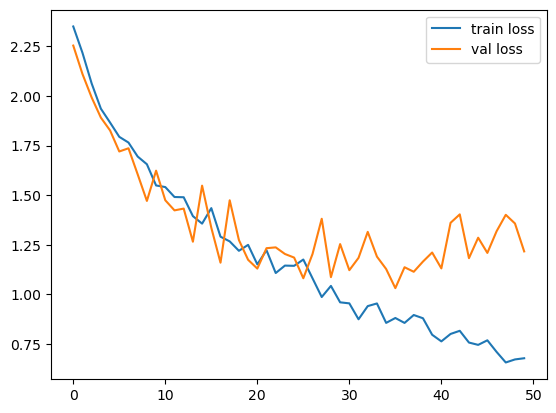

In [10]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

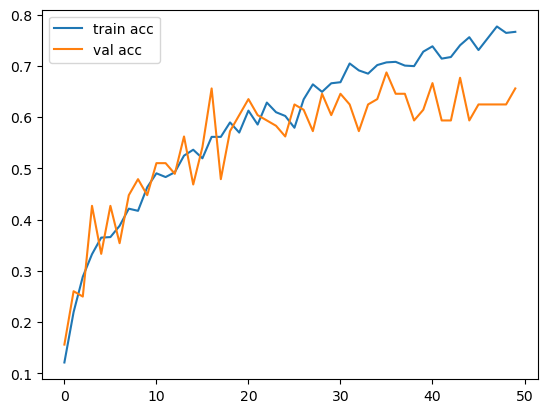

In [11]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [12]:
labels = [i for i in testing_generator.class_indices]
print(labels)

['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'Molly', 'NeonTetra', 'Sapusapu', 'Zebra']


## Conf Matrix

5/5 [==============================] - 2s 309ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.38      0.24      0.29        25
           2       0.00      0.00      0.00         3
           3       0.18      0.22      0.20         9
           4       0.00      0.00      0.00         5
           5       0.10      0.17      0.12         6
           6       0.06      0.07      0.06        14
           7       0.27      0.16      0.20        25
           8       0.00      0.00      0.00         7
           9       0.07      0.07      0.07        14
          10       0.08      0.08      0.08        13

    accuracy                           0.12       129
   macro avg       0.10      0.09      0.09       129
weighted avg       0.16      0.12      0.14       129



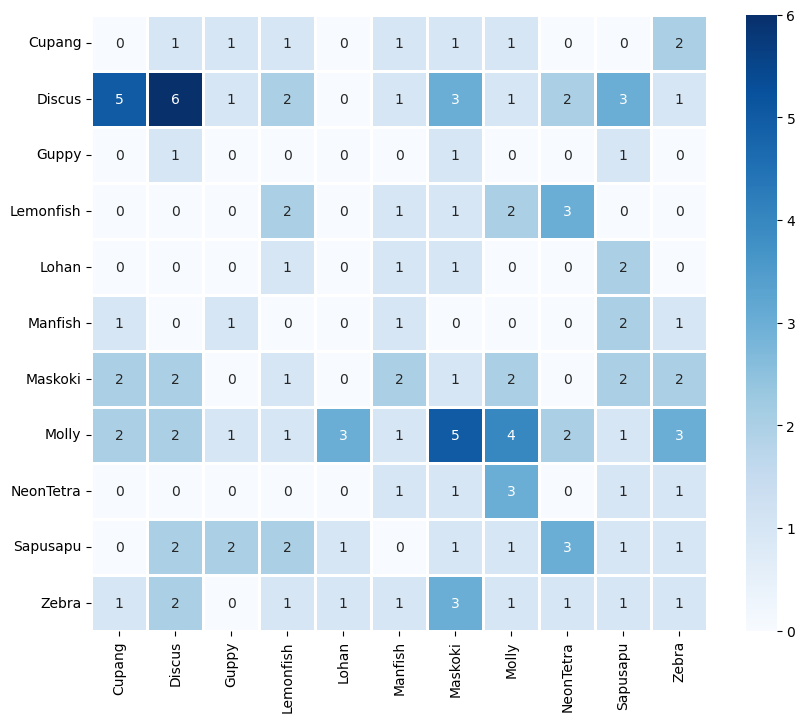

In [13]:
model.evaluate(testing_generator,batch_size=32)
y_pred=model.predict(testing_generator)
y_pred=np.argmax(y_pred,axis=1)
accuracy_score(y_pred,testing_generator.classes)
print(classification_report(y_pred,testing_generator.classes))

import seaborn as sns

# confusion_matrix
index = labels
columns = labels  
cm = confusion_matrix(y_pred, testing_generator.classes)
cm_df = pd.DataFrame(cm,columns,index)                      
fig = plt.figure(figsize=(10,8),dpi=100)  
fig = sns.heatmap(cm_df,cmap='Blues',annot=True, fmt="d",linewidths=1, square=True)